Загрузка необходимых библиотек

desicion tree
linear models
classical bias
extra trees
подбор гиперпараметров (giperopt и optuna)

In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor 

Загрузка и подготовка данных

In [230]:
df = pd.read_csv('possum.csv')

# fill na as medians
age_mean = df['age'].median()
footlgth_mean = df['footlgth'].median()
df['age'] = df['age'].fillna(age_mean)
df['footlgth'] = df['footlgth'].fillna(footlgth_mean)

label_encoder = LabelEncoder()
df['Pop'] = label_encoder.fit_transform(df['Pop'])
df['sex'] = label_encoder.fit_transform(df['sex']) # 1 - m; 0 - w

df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,0,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,0,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,0,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,0,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,1,1,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,1,1,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,1,0,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,1,1,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [231]:
df.dtypes

case          int64
site          int64
Pop           int64
sex           int64
age         float64
hdlngth     float64
skullw      float64
totlngth    float64
taill       float64
footlgth    float64
earconch    float64
eye         float64
chest       float64
belly       float64
dtype: object

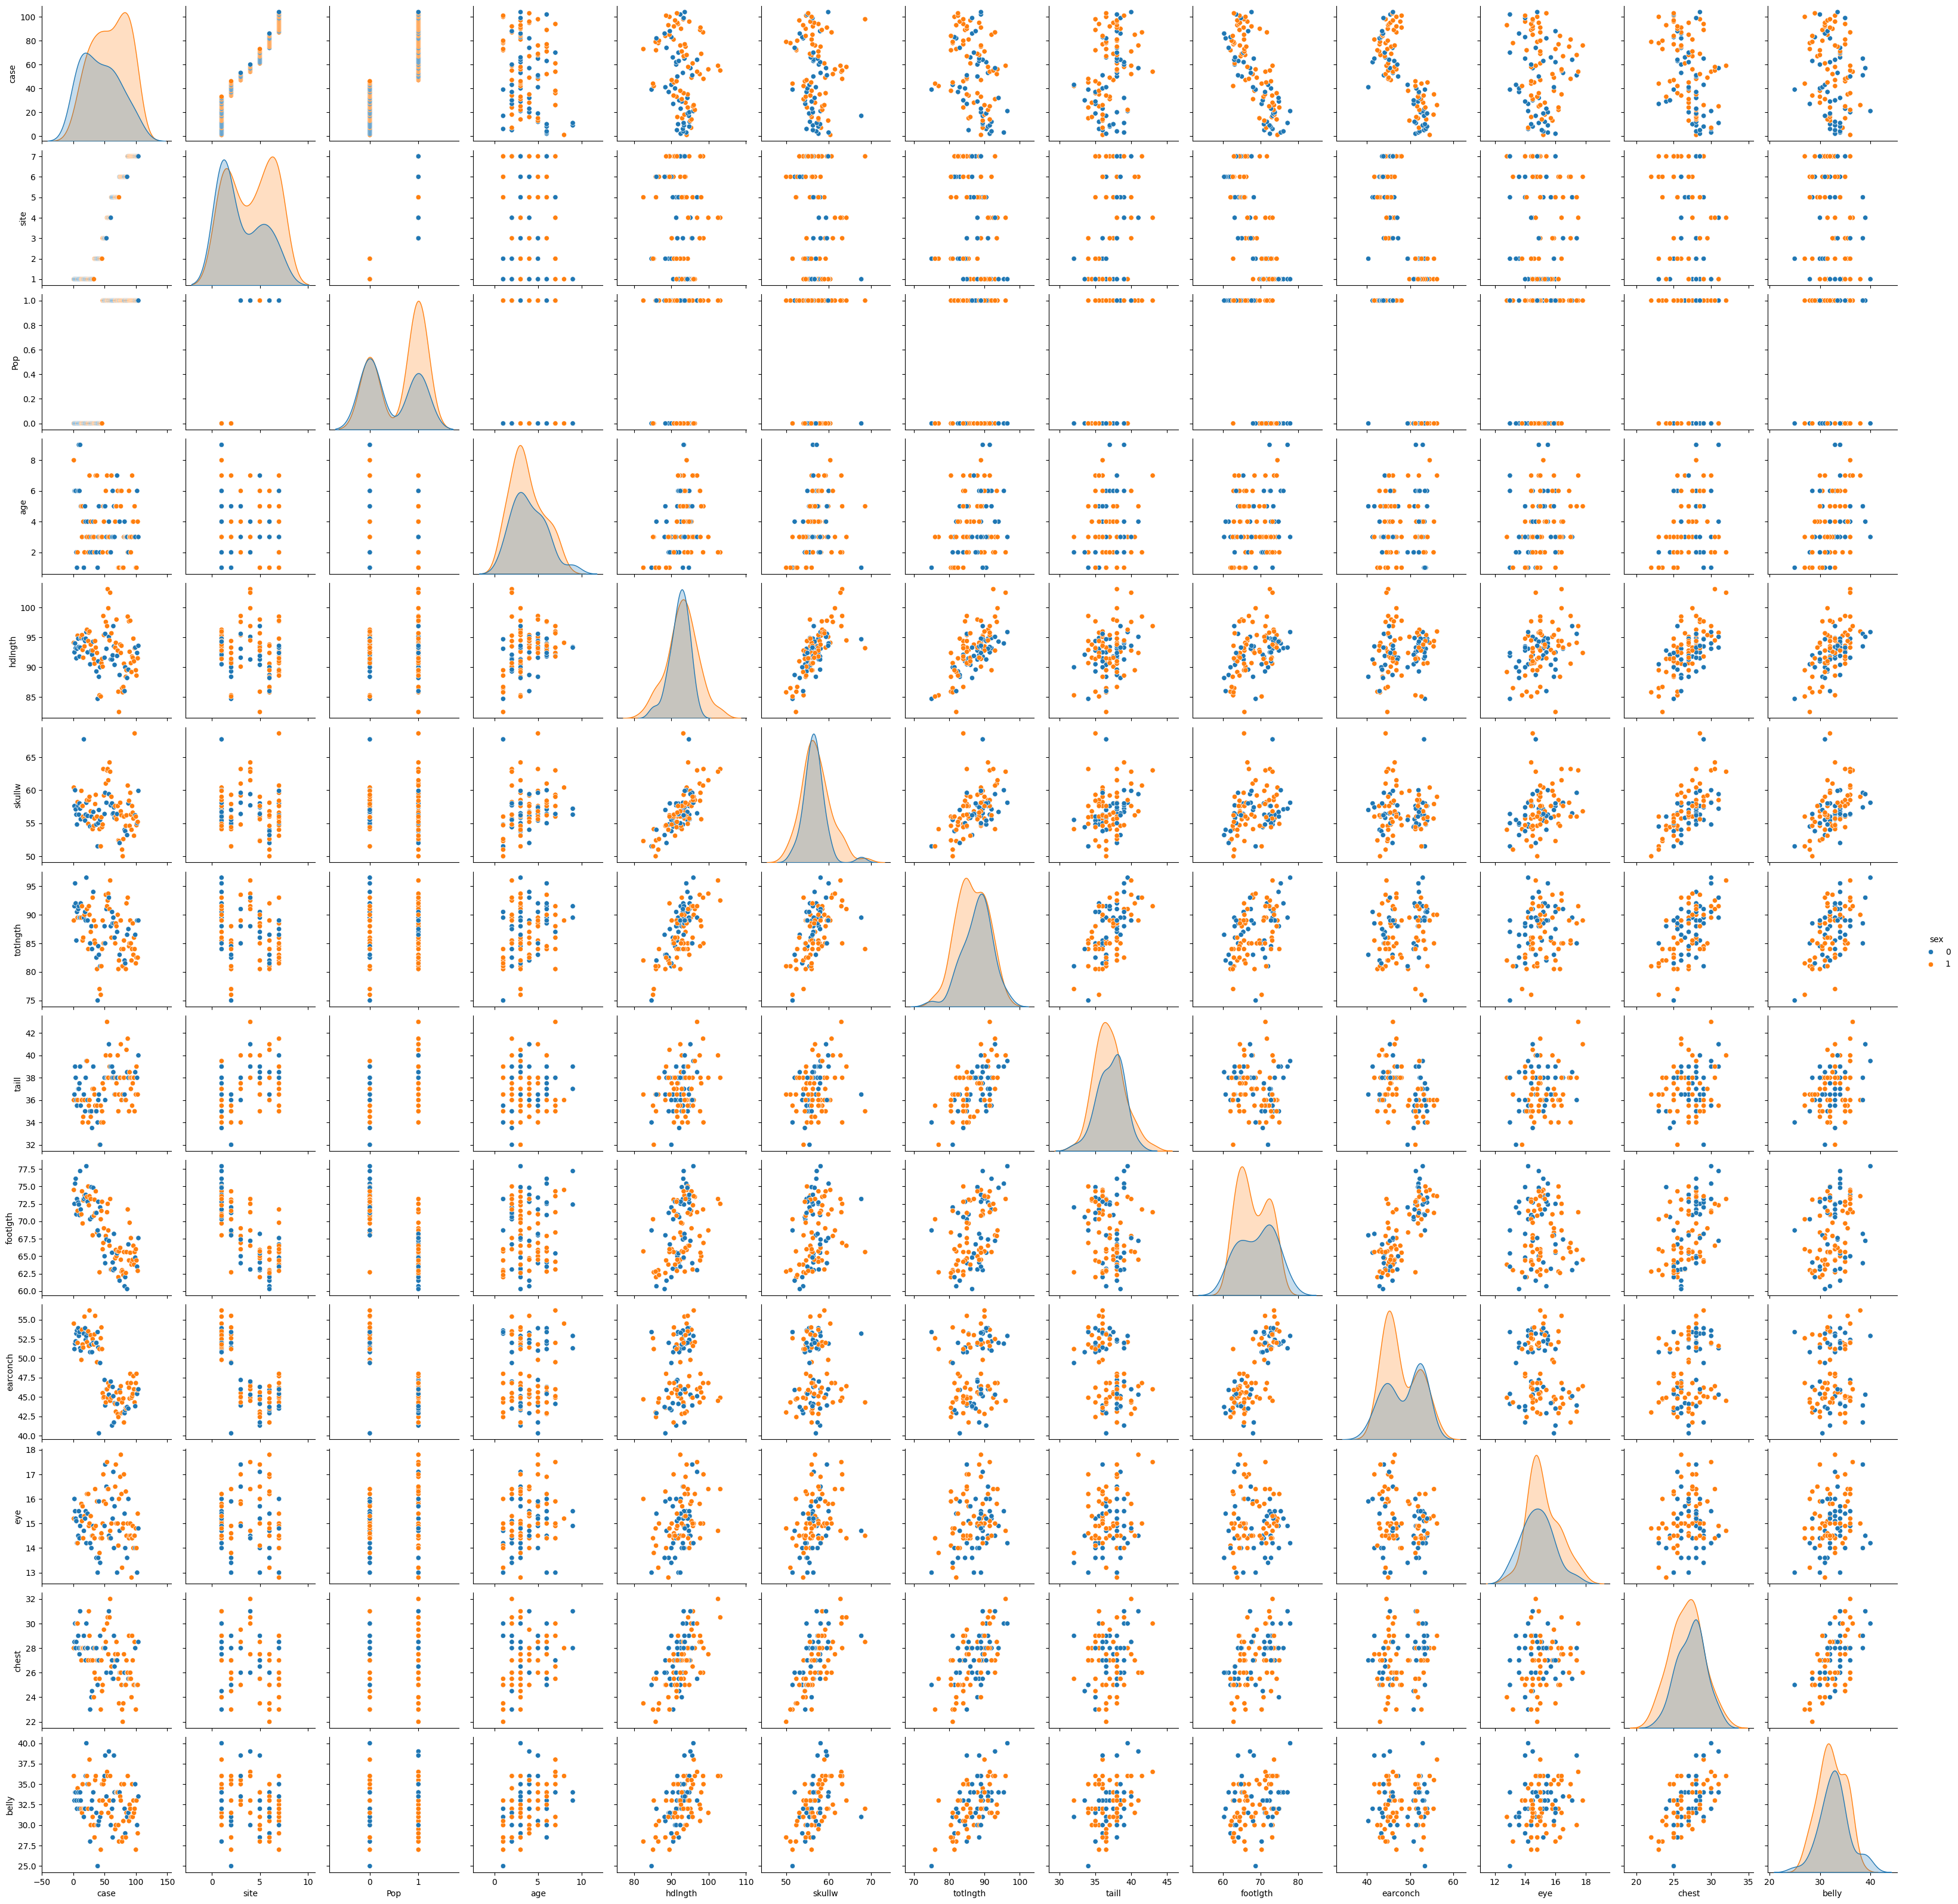

In [232]:
sns.pairplot(df, hue='sex')
plt.show()

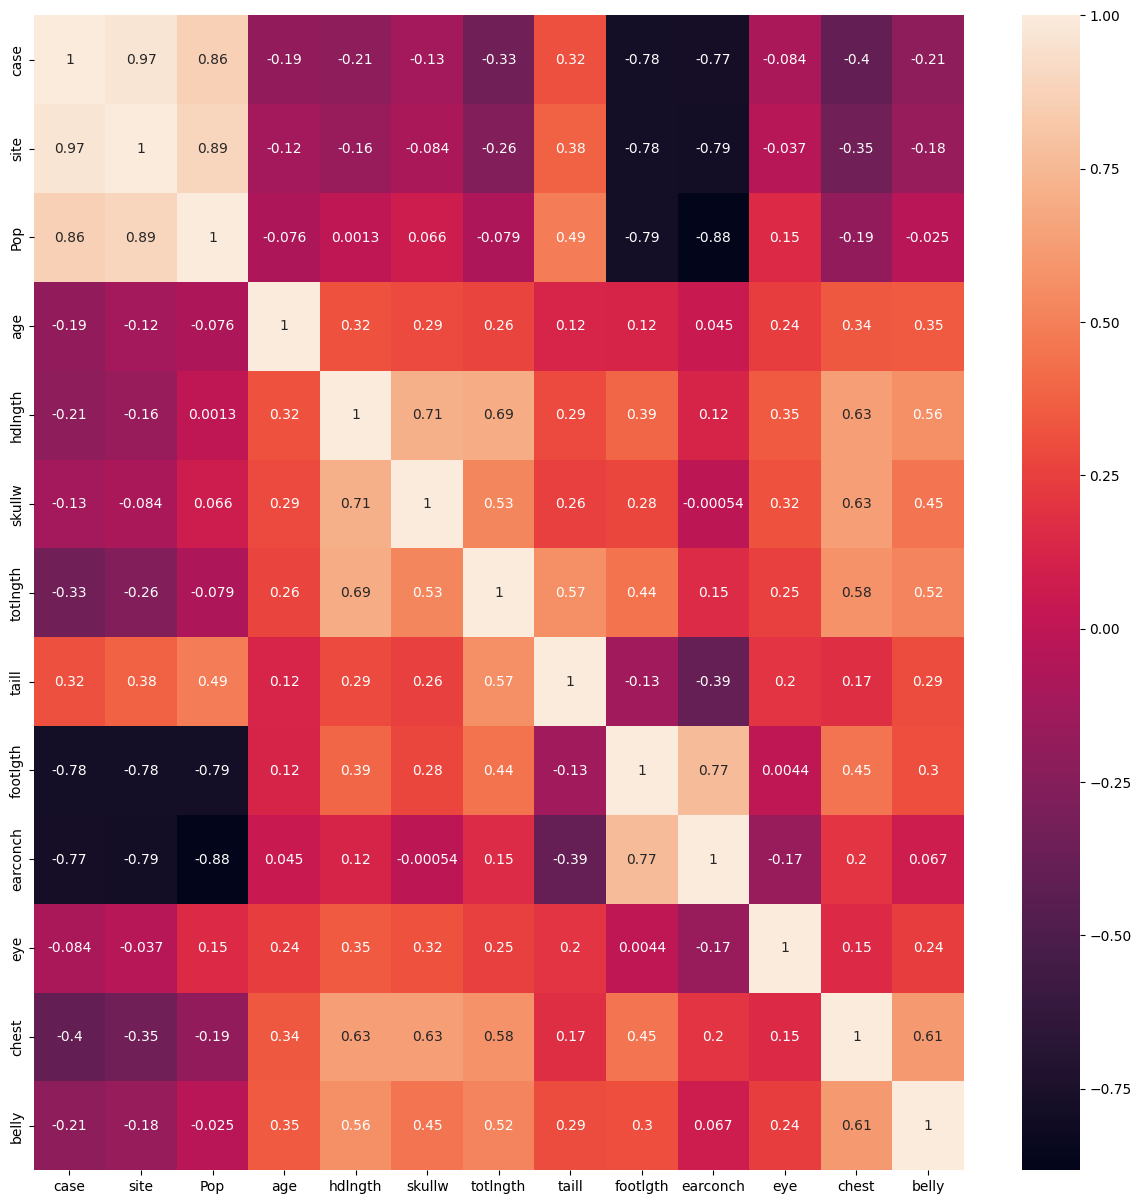

In [233]:
fig,ax = plt.subplots(figsize=(15,15))
data = df.drop('sex', axis=1)
sns.heatmap(data.corr(),annot=True)
plt.show()

In [234]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

In [235]:
df['sex'].value_counts()

sex
1    61
0    43
Name: count, dtype: int64

Разделение данных на признаки и целевую переменную. Разделение на обучающую и тестовую выборки.

In [236]:
Y = df['sex']
X = df.loc[:, (df.columns !='sex')] 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Стандартизация данных

In [237]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Понижение размерности

In [238]:
# Создание и обучение моделей
log_reg = LogisticRegression(penalty='l2')
log_reg.fit(X_train_scaled, y_train)

rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

# Предсказание на тестовых данных
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

# Оценка моделей
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_log_reg = classification_report(y_test, y_pred_log_reg)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Accuracy of logistic regression: {accuracy_log_reg}")
print(report_log_reg)
print(f"Accuracy of random forest: {accuracy_rf}")
print(report_rf)

Accuracy of logistic regression: 0.75
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        14
           1       0.78      0.78      0.78        18

    accuracy                           0.75        32
   macro avg       0.75      0.75      0.75        32
weighted avg       0.75      0.75      0.75        32

Accuracy of random forest: 0.65625
              precision    recall  f1-score   support

           0       0.64      0.50      0.56        14
           1       0.67      0.78      0.72        18

    accuracy                           0.66        32
   macro avg       0.65      0.64      0.64        32
weighted avg       0.65      0.66      0.65        32

